# Sliding cover

In [5]:
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm
import face_recognition
import time
from IPython.display import clear_output
import pickle



## Load Sample Dataset

In [7]:
root_folder = r'../data/celeb_dataset/img_align_celeba/normal/'
sample_df = pd.read_csv('../data/preds_on_all_augmentations.csv')

# The covering function

In [8]:
def count_covered_pixels(image_path, window_size, step):
    # Load the image and convert it to a NumPy array
    image = Image.open(image_path)
    data = np.asarray(image)
    
    # Initialize the count array with zeros
    count_array = np.zeros(data.shape[:2], dtype=int)
    pred_array = np.zeros(data.shape[:2], dtype=int)
    
    # Define the sliding window's height and width
    window_height, window_width = window_size
    
    # Iterate through the image using the sliding window
    for i in tqdm(range(0, data.shape[0] - window_height + 1, step)):
        for j in range(0, data.shape[1] - window_width + 1, step):
            if j == 2:

                return pred_array , count_array
            # Increment the count for each pixel covered by the window
            count_array[i:i + window_height, j:j + window_width] += 1

            temp_data = data.copy()
            temp_data[i:i + window_height, j:j + window_width] = 0

            face_locations = face_recognition.face_locations(temp_data)
            if len(face_locations) > 0:
                pred_array[i:i + window_height, j:j + window_width] += 1 
            

    
    return pred_array , count_array

In [9]:
# Example usage
image_path = root_folder + sample_df.iloc[0]['image_id']
window_size = 40,40
step = 3

pred_array , count_array = count_covered_pixels(image_path, window_size, step)


100%|██████████| 60/60 [00:37<00:00,  1.59it/s]


/var/folders/18/lkk4lh9d5hb1bmvlwb1kcsth0000gn/T/ipykernel_4587/2183388250.py:1: RuntimeWarning: invalid value encountered in divide
  res_arr = pred_array / count_array


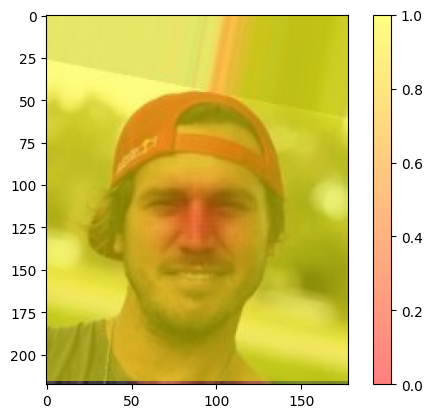

In [10]:

res_arr = pred_array / count_array
image = face_recognition.load_image_file(root_folder + sample_df.iloc[0]['image_id'])
plt.imshow(image)
plt.imshow(res_arr,vmin=0,vmax=1 ,alpha=0.5,cmap='autumn')
plt.colorbar()
plt.show()

clear_output(wait=True)

(86, 135, 176, 46)


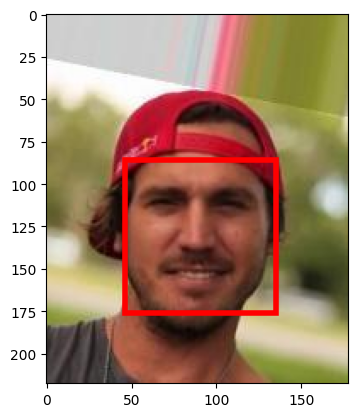

In [11]:
img = face_recognition.load_image_file(root_folder + sample_df.iloc[0]['image_id'])
locs = face_recognition.face_locations(img)[0]
print(locs)
plt.imshow(img)
ax = plt.gca()
rect = patches.Rectangle((locs[3], locs[0]), locs[1]-locs[3], locs[2]-locs[0], linewidth=4, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()